# **Analysis and Visualisation Using PySpark**

1.   Data is read from bucket and analysed in jupyter notebook
2.   Visualisation of the data and storing in bucket





In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 27 kB/s 
     |████████████████████████████████| 199 kB 41.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=1cfcfba6eb51e056b0501d0ddb8a5d3452c198c629fde25bb26f50e6fc3e6357
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
spark = SparkSession \
.builder \
.appName("Python Spark create RDD example") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()

In [ ]:
from pyspark.sql import SQLContext
sqlContext = HiveContext(sc)

In [ ]:
# table data libs
import numpy as np
import pandas as pd
from pandas_datareader import wb

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from plotly.subplots import make_subplots

# predefine color pallette alias
cnf = 'grey' # confirmed
dth = 'red' # death
rec = 'lightgreen' # recovered
act = 'orange' # active

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# html embedding
from IPython.display import Javascript
from IPython.core.display import display
from IPython.core.display import HTML

# to improve matplotlib graphs
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [ ]:
df = spark.read.format('com.databricks.spark.csv').\
options(header='true', \
inferschema='true').\
load("gs://dyutishriya-bucketdbms/Data/covid_19_data.csv",header=True)

In [ ]:
df1 = spark.read.format('com.databricks.spark.csv').\
options(header='true', \
inferschema='true').\
load("gs://dyutishriya-bucketdbms/Data/covid_19_clean_complete.csv",header=True)

In [ ]:
df2 = spark.read.format('com.databricks.spark.csv').\
options(header='true', \
inferschema='true').\
load("gs://dyutishriya-bucketdbms/Data/migration_population.csv",header=True)

In [ ]:
from pyspark.sql import SparkSession, SQLContext, Row
gcs_bucket='dyutishriya-bucketdbms'
spark=SparkSession.builder.appName("kdd").getOrCreate()
sc=spark.sparkContext
df= "gs://"+gcs_bucket+"/Data/covid_19_data.csv"
df1= "gs://"+gcs_bucket+"/Data/covid_19_clean_complete.csv"
df2= "gs://"+gcs_bucket+"/Data/migration_population.csv"


In [ ]:
df = spark.read.format('com.databricks.spark.csv').\
options(header='true', \
inferschema='true').\
load("hdfs://covid_19_data.csv",header=True)

In [ ]:
df2.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- population: double (nullable = true)
 |-- pop_density: double (nullable = true)
 |-- net_migration: double (nullable = true)
 |-- migration_perc: double (nullable = true)
 |-- iso3c: string (nullable = true)
 |-- iso2c: string (nullable = true)
 |-- region: string (nullable = true)
 |-- adminregion: string (nullable = true)
 |-- incomeLevel: string (nullable = true)
 |-- lendingType: string (nullable = true)
 |-- capitalCity: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)



In [ ]:
df2.show(5)

+----------+----+------------+----------------+-------------+--------------------+-----+-----+----------+-----------+-----------+-----------+-----------+---------+--------+
|   country|year|  population|     pop_density|net_migration|      migration_perc|iso3c|iso2c|    region|adminregion|incomeLevel|lendingType|capitalCity|longitude|latitude|
+----------+----+------------+----------------+-------------+--------------------+-----+-----+----------+-----------+-----------+-----------+-----------+---------+--------+
|Arab World|2018|4.19790588E8|37.3723653654038|         null|                null|  ARB|   1A|Aggregates|       null| Aggregates| Aggregates|       null|     null|    null|
|Arab World|2017|4.11898965E8|  36.66980407291|   -1408824.0|-0.00342031449387...|  ARB|   1A|Aggregates|       null| Aggregates| Aggregates|       null|     null|    null|
|Arab World|2016|4.04024433E8|35.9687643273844|         null|                null|  ARB|   1A|Aggregates|       null| Aggregates| Aggre

In [ ]:
df1.printSchema()

root
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Long: double (nullable = true)
 |-- Date: string (nullable = true)
 |-- Confirmed: integer (nullable = true)
 |-- Deaths: integer (nullable = true)
 |-- Recovered: integer (nullable = true)



In [ ]:
df1.show(5)

+--------------+--------------+--------+-------+-------+---------+------+---------+
|Province/State|Country/Region|     Lat|   Long|   Date|Confirmed|Deaths|Recovered|
+--------------+--------------+--------+-------+-------+---------+------+---------+
|          null|   Afghanistan|    33.0|   65.0|1/22/20|        0|     0|        0|
|          null|       Albania| 41.1533|20.1683|1/22/20|        0|     0|        0|
|          null|       Algeria| 28.0339| 1.6596|1/22/20|        0|     0|        0|
|          null|       Andorra| 42.5063| 1.5218|1/22/20|        0|     0|        0|
|          null|        Angola|-11.2027|17.8739|1/22/20|        0|     0|        0|
+--------------+--------------+--------+-------+-------+---------+------+---------+
only showing top 5 rows



In [ ]:
df.printSchema()

root
 |-- SNo: integer (nullable = true)
 |-- ObservationDate: string (nullable = true)
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Last Update: string (nullable = true)
 |-- Confirmed: double (nullable = true)
 |-- Deaths: double (nullable = true)
 |-- Recovered: double (nullable = true)



In [ ]:
df.show(5)

+---+---------------+--------------+--------------+---------------+---------+------+---------+
|SNo|ObservationDate|Province/State|Country/Region|    Last Update|Confirmed|Deaths|Recovered|
+---+---------------+--------------+--------------+---------------+---------+------+---------+
|  1|     01/22/2020|         Anhui|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  2|     01/22/2020|       Beijing|Mainland China|1/22/2020 17:00|     14.0|   0.0|      0.0|
|  3|     01/22/2020|     Chongqing|Mainland China|1/22/2020 17:00|      6.0|   0.0|      0.0|
|  4|     01/22/2020|        Fujian|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  5|     01/22/2020|         Gansu|Mainland China|1/22/2020 17:00|      0.0|   0.0|      0.0|
+---+---------------+--------------+--------------+---------------+---------+------+---------+
only showing top 5 rows



In [ ]:
Province = df.select('Province/State').fillna('Unknown')

In [ ]:
df = df.fillna({'Province/State':'Unknown'})

In [ ]:
df.show(5)

+---+---------------+--------------+--------------+---------------+---------+------+---------+
|SNo|ObservationDate|Province/State|Country/Region|    Last Update|Confirmed|Deaths|Recovered|
+---+---------------+--------------+--------------+---------------+---------+------+---------+
|  1|     01/22/2020|         Anhui|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  2|     01/22/2020|       Beijing|Mainland China|1/22/2020 17:00|     14.0|   0.0|      0.0|
|  3|     01/22/2020|     Chongqing|Mainland China|1/22/2020 17:00|      6.0|   0.0|      0.0|
|  4|     01/22/2020|        Fujian|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  5|     01/22/2020|         Gansu|Mainland China|1/22/2020 17:00|      0.0|   0.0|      0.0|
+---+---------------+--------------+--------------+---------------+---------+------+---------+
only showing top 5 rows



In [ ]:
# Daily general statistics per country - cleaned
daily_stat = pd.read_csv('hdfs://covid_19_clean_complete.csv', 
                         parse_dates=['Date'])

# Grouped by day, country
# =======================

full_grouped = pd.read_csv('hdfs://full_grouped.csv')
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])

# Active Case = confirmed - deaths - recovered
daily_stat['Active'] = daily_stat['Confirmed'] - daily_stat['Deaths'] - daily_stat['Recovered']

# Not all provinces are present - fillna
daily_stat[['Province/State']] = daily_stat[['Province/State']].fillna('')

# predefine latest available report for current situation statistics 
last_report = daily_stat[daily_stat['Date'] == max(daily_stat['Date'])].reset_index()

# last_report grouped by countries and Chinese provinces
countries_last_report = last_report.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
china_last_report = last_report[last_report['Country/Region']!='China'].groupby('Province/State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

# -------------------------------
# READING POPULATION DENSITY DATA

# Reading and cleaning the data - this code is taken from worldbankdataset 
wb_countries = wb.get_countries()
country_list = wb_countries[wb_countries['region']!='Aggregates']['name'].reset_index(drop=True)

indicator_ids = ['EN.POP.DNST', 'SP.POP.TOTL', 'SM.POP.NETM']

migration = wb.WorldBankReader(symbols=['SM.POP.NETM'], start=1950, end=2018, countries='all').read()
pop_density = wb.WorldBankReader(symbols=['EN.POP.DNST'], start=1950, end=2018, countries='all').read()
population = wb.WorldBankReader(symbols=['SP.POP.TOTL'], start=1950, end=2018, countries='all').read()

pop_density_countries = pop_density.reset_index()#.query('country in @country_list').reset_index(drop=True)
population_countries = population.reset_index()#.query('country in @country_list').reset_index(drop=True)
migration_countries = migration.reset_index()#.query('country in @country_list').reset_index(drop=True)

pop_density_merged = pd.merge(population_countries, pop_density_countries, on=['country', 'year'], how='outer')
migration_final = (pd.merge(pop_density_merged, migration_countries, on=['country', 'year'], how='outer')
                   .rename(columns={'SP.POP.TOTL': 'population',
                                    'EN.POP.DNST': 'pop_density',
                                    'SM.POP.NETM': 'net_migration'})
                   .assign(migration_perc=lambda df: df['net_migration'].div(df['population'])))

migration_final = pd.merge(migration_final, wb_countries, how='left', left_on='country', right_on='name')
migration_final.drop('name', axis=1).to_csv('migration_population.csv', index=False)

migration_final['year'] = migration_final['year'].astype(int)
pop_info = migration_final[migration_final['year']==2018][['country','population','pop_density']]

# substitute for missing values
cols = ['Curacao','Eritrea', 'Monaco','South Sudan','Sudan']
pops = [370, 35, 26337,18,25]
for c, p in zip(cols, pops):
    pop_info.loc[pop_info['country']== c, 'pop_density'] = p

# replace country names 
name = {
    'Congo, Dem. Rep.': 'Congo (Kinshasa)',
    'Egypt, Arab Rep.': 'Egypt',
    'Hong Kong SAR, China': 'Hong Kong',
    'Iran, Islamic Rep.': 'Iran (Islamic Republic of)',
    'Macao SAR, China': 'Macau',
    'Hong Kong SAR': 'Hong Kong',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Korea, Rep.': 'Republic of Korea',
    'United Kingdom': 'UK',
    'United States': 'US' }
pop_info.loc[:, 'country'] = pop_info.loc[: 'country'].replace(name)


In [ ]:
temp = daily_stat.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)

# Pandas styling tool - we can apply any custom function to every series
def coloring(s):
    if s.name =='Confirmed':
        return ['background-color: ' + cnf for v in s]
    elif s.name =='Deaths':
        return ['background-color: ' + dth for v in s]
    elif s.name =='Recovered':
        return ['background-color: ' + rec for v in s]
    elif s.name =='Active':
        return ['background-color: ' + act for v in s]
    else:
        return ['' for v in s]
temp.style.apply(coloring,axis=0)

,Date,Confirmed,Deaths,Recovered,Active
0,2020-04-30 00:00:00,3256841,233388,986389,2037064


### Replacing "Mainland China" with "China" 

In [ ]:
df = df.withColumn('Country/Region', regexp_replace('Country/Region', 'Mainland China', 'China'))

In [ ]:
df.show(5)

+---+---------------+--------------+--------------+---------------+---------+------+---------+
|SNo|ObservationDate|Province/State|Country/Region|    Last Update|Confirmed|Deaths|Recovered|
+---+---------------+--------------+--------------+---------------+---------+------+---------+
|  1|     01/22/2020|         Anhui|         China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  2|     01/22/2020|       Beijing|         China|1/22/2020 17:00|     14.0|   0.0|      0.0|
|  3|     01/22/2020|     Chongqing|         China|1/22/2020 17:00|      6.0|   0.0|      0.0|
|  4|     01/22/2020|        Fujian|         China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  5|     01/22/2020|         Gansu|         China|1/22/2020 17:00|      0.0|   0.0|      0.0|
+---+---------------+--------------+--------------+---------------+---------+------+---------+
only showing top 5 rows



### Creating New Column in DF "Active_cases"

In [ ]:
df = df.withColumn("Active_case", df['Confirmed'] - df['Deaths'] - df['Recovered'])

In [ ]:
df.show(5)

+---+---------------+--------------+--------------+---------------+---------+------+---------+-----------+
|SNo|ObservationDate|Province/State|Country/Region|    Last Update|Confirmed|Deaths|Recovered|Active_case|
+---+---------------+--------------+--------------+---------------+---------+------+---------+-----------+
|  1|     01/22/2020|         Anhui|         China|1/22/2020 17:00|      1.0|   0.0|      0.0|        1.0|
|  2|     01/22/2020|       Beijing|         China|1/22/2020 17:00|     14.0|   0.0|      0.0|       14.0|
|  3|     01/22/2020|     Chongqing|         China|1/22/2020 17:00|      6.0|   0.0|      0.0|        6.0|
|  4|     01/22/2020|        Fujian|         China|1/22/2020 17:00|      1.0|   0.0|      0.0|        1.0|
|  5|     01/22/2020|         Gansu|         China|1/22/2020 17:00|      0.0|   0.0|      0.0|        0.0|
+---+---------------+--------------+--------------+---------------+---------+------+---------+-----------+
only showing top 5 rows



### Creating chronological order DataFrame of sum(Recovered), sum(Deaths), sum(Confirmed) and sum(Active_case) 

In [ ]:
max_date =  df.select(max("ObservationDate")).first()
group = df.groupBy("ObservationDate")
group_data = group.agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum', 'Active_case':'sum'}).sort(col("ObservationDate"))
group_data.show()

+---------------+--------------+-----------+--------------+----------------+
|ObservationDate|sum(Recovered)|sum(Deaths)|sum(Confirmed)|sum(Active_case)|
+---------------+--------------+-----------+--------------+----------------+
|     01/01/2021|   4.7313005E7|  1834675.0|   8.4092619E7|     3.4944939E7|
|     01/02/2021|   4.7614297E7|  1843108.0|   8.4718978E7|     3.5261573E7|
|     01/03/2021|   4.7882779E7|  1850449.0|   8.5251774E7|     3.5518546E7|
|     01/04/2021|   4.8173187E7|  1860598.0|   8.5805892E7|     3.5772107E7|
|     01/05/2021|   4.8488548E7|  1875953.0|   8.6546014E7|     3.6181513E7|
|     01/06/2021|   4.8801673E7|  1891006.0|   8.7329386E7|     3.6636707E7|
|     01/07/2021|   4.9125604E7|  1905926.0|   8.8210223E7|     3.7178693E7|
|     01/08/2021|   4.9422867E7|  1921092.0|   8.9013445E7|     3.7669486E7|
|     01/09/2021|   4.9753112E7|  1933877.0|   8.9774439E7|      3.808745E7|
|     01/10/2021|   5.0023662E7|  1942225.0|   9.0363573E7|     3.8397686E7|

### Line Chart of increase in 'Recovered', 'Deaths', 'Confirmed', 'Active_case'

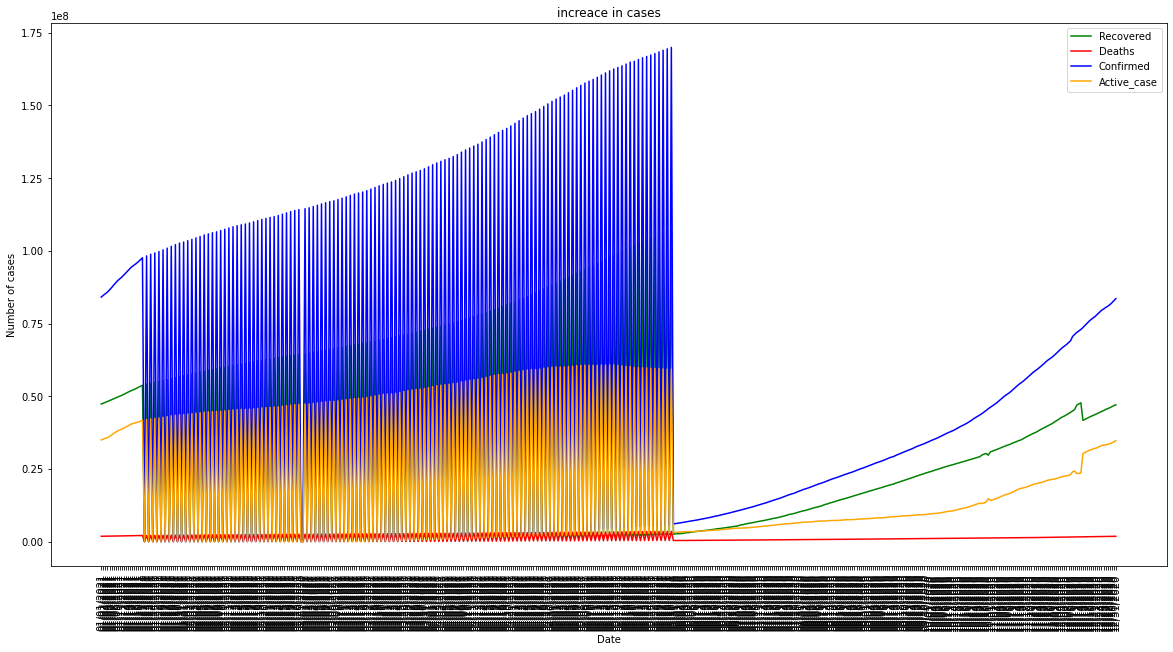

In [ ]:
group_data=group_data.toPandas()
import matplotlib.pyplot as plt
ObservationDate = group_data['ObservationDate']
Recovered = group_data['sum(Recovered)']
Deaths = group_data['sum(Deaths)']
Confirmed = group_data['sum(Confirmed)']
Active_case = group_data['sum(Active_case)']
plt.figure(figsize=(20,10))
l1, = plt.plot(ObservationDate, Recovered, color='g')
l2, = plt.plot(ObservationDate, Deaths, color='r')
l3, = plt.plot(ObservationDate, Confirmed, color='b')
l4, = plt.plot(ObservationDate, Active_case, color='orange')
patches = [l1,l2,l3,l4]
labels = ['Recovered', 'Deaths', 'Confirmed', 'Active_case']
plt.legend(patches, labels, loc="best")
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title('increace in cases')
plt.xticks(rotation=90)
plt.show()

### Showing world wide Latest Data

In [ ]:
from pyspark.sql import functions as F
mx_date=df.select(F.max("ObservationDate")).collect()[0][0]
Data_world = df.filter(F.col("ObservationDate")==mx_date)\
.groupBy("ObservationDate")\
.agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum', 'Active_case':'sum'})
Data_world=Data_world.toPandas()

In [ ]:
Data_world.head()

,ObservationDate,sum(Recovered),sum(Deaths),sum(Confirmed),sum(Active_case)
0,12/31/2020,47032627.0,1825012.0,83559601.0,34701962.0


In [ ]:
import plotly.express as px
labels = ["Active cases","Recovered","Deaths"]
values = Data_world.loc[0, ["sum(Active_case)","sum(Recovered)","sum(Deaths)"]]
fig = px.pie(Data_world, values=values, names=labels, color_discrete_sequence=['blue','green','red'])
fig.update_layout(
    title='Total cases : '+str(Data_world["sum(Confirmed)"][0]),
)
fig.show()

In [ ]:
fig = px.sunburst(last_report.sort_values(by='Confirmed', ascending=False).reset_index(drop=True), path=["Country/Region", "Province/State"], values="Confirmed", title='Confirmed Cases', color_discrete_sequence = px.colors.qualitative.Prism)
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [ ]:
# Over the time

fig = px.choropleth(full_grouped, locations="Country/Region", 
                    color=np.log(full_grouped["Confirmed"]),
                    locationmode='country names', hover_name="Country/Region", 
                    animation_frame=full_grouped["Date"].dt.strftime('%Y-%m-%d'),
                    title='Cases over time', color_continuous_scale=px.colors.sequential.matter)
fig.update(layout_coloraxis_showscale=False)
fig.show()

# **Top 20 Countries**

In [ ]:
temp_f = countries_last_report.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.iloc[:20].style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered,Active
0,US,1069424,62996,153947,852481
1,Spain,213435,24543,112050,76842
2,Italy,205463,27967,75945,101551
3,United Kingdom,172481,26842,859,144780
4,France,167299,24410,50380,92509
5,Germany,163009,6623,123500,32886
6,Turkey,120204,3174,48886,68144
7,Russia,106498,1073,11619,93806
8,Iran,94640,6028,75103,13509
9,Brazil,87187,6006,35935,45246


In [ ]:
temp = temp_f.iloc[:20].sort_values(by='Confirmed', ascending=True)

fig = go.Figure()

fig.add_trace(go.Bar(
    y=temp['Country/Region'],
    x=temp['Deaths'],
    name='Deaths',
    orientation='h',
    marker=dict(
        color=dth)
    )
)
fig.add_trace(go.Bar(
    y=temp['Country/Region'],
    x=temp['Recovered'],
    name='Recovered',
    orientation='h',
    marker=dict(
        color=rec)
    )
)

fig.add_trace(go.Bar(
    y=temp['Country/Region'],
    x=temp['Active'],
    name='Active',
    orientation='h',
    marker=dict(
        color=act)
    )
)

fig.update_layout(barmode='stack')
fig.show()

Spead of cases by Case type

In [ ]:
# GLOBALLY
temp = daily_stat.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
fig = px.area(temp, x="Date", y="Count", color='Case',
             title='Cases over time - Global', color_discrete_sequence = [rec, dth, act], height=400)
fig.show()

# CHINA
temp = daily_stat[daily_stat['Country/Region']=='China'].groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case',
             title='Cases over time - China', color_discrete_sequence = [rec, dth, act], height=400)
fig.show()

# ROW
temp = daily_stat[daily_stat['Country/Region']!='China'].groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case',
             title='Cases over time - Rest of the world', color_discrete_sequence = [rec, dth, act],height=400)

Death Cases Map

In [ ]:
formated_gdf = daily_stat.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Deaths'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     size='size', hover_name="Country/Region", color_discrete_sequence=[dth],
                     title='Spread over time')

            
fig.update(layout_coloraxis_showscale=False)
fig.update_geos(
    resolution=50,
    showland=True, landcolor="DarkGrey",
    showocean=True, oceancolor="DimGrey",
    showlakes=True, lakecolor="DimGrey",
    showcountries=True, countrycolor="lightGrey"
)
fig.update_layout(height=500, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True)
fig.show()

Confirmed Cases map

In [ ]:
formated_gdf = daily_stat.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.4)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2],
                     title='Spread over time',)
fig.update(layout_coloraxis_showscale=False)
fig.update_geos(
    resolution=50,
    showland=True, landcolor="DarkGrey",
    showocean=True, oceancolor="DimGrey",
    showlakes=True, lakecolor="DimGrey",
    showcountries=True, countrycolor="lightGrey"
)
fig.update_layout(height=500, margin={"r":0,"t":0,"l":0,"b":0})
#fig.update_geos(lataxis_showgrid=True, lonaxis_showgrid=True)
fig.show()

### sum(Recovered) sum(Deaths) sum(Confirmed) sum(Active_case) in each country

In [ ]:
Data_world_byCountry = df.filter(F.col("ObservationDate")==mx_date)\
.groupBy("Country/Region")\
.agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum','Active_case':'sum'}).sort(col("sum(Confirmed)").desc())

In [ ]:
Data_world_byCountry=Data_world_byCountry.toPandas()
Data_world_byCountry.head()

,Country/Region,sum(Recovered),sum(Deaths),sum(Confirmed),sum(Active_case)
0,US,0.0,352163.0,20099363.0,19747200.0
1,India,9860280.0,148738.0,10266674.0,257656.0
2,Brazil,6848844.0,194949.0,7675973.0,632180.0
3,Russia,2527722.0,56271.0,3127347.0,543354.0
4,France,200142.0,64759.0,2677666.0,2412765.0


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(
            x=Data_world_byCountry['Country/Region'][0:10], y=Data_world_byCountry['sum(Confirmed)'][0:10],
            text=Data_world_byCountry['sum(Confirmed)'][0:10].apply(str),
            textposition='auto')])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
)
fig.show()
fig = go.Figure(data=[go.Scatter(
    x=Data_world_byCountry['Country/Region'][0:10],
    y=Data_world_byCountry['sum(Confirmed)'][0:10],
    mode='markers',
    marker=dict(
        color=[145, 140, 135, 130, 125, 120,115,110,105,100],
        size=[100, 90, 70, 60, 60, 60,50,50,40,35],
        showscale=True
        )
)])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
)
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(
            x=Data_world_byCountry['Country/Region'][0:10], y=Data_world_byCountry['sum(Deaths)'][0:10],
            text=Data_world_byCountry['sum(Deaths)'][0:10].apply(str),
            textposition='auto')])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Death Cases",
)
fig.show()
fig = go.Figure(data=[go.Scatter(
    x=Data_world_byCountry['Country/Region'][0:10],
    y=Data_world_byCountry['sum(Deaths)'][0:10],
    mode='markers',
    marker=dict(
        color=[145, 140, 135, 130, 125, 120,115,110,105,100],
        size=[100, 90, 70, 60, 60, 60,50,50,40,35],
        showscale=True
        )
)])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Death Cases",
)
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(
            x=Data_world_byCountry['Country/Region'][0:10], y=Data_world_byCountry['sum(Recovered)'][0:10],
            text=Data_world_byCountry['sum(Recovered)'][0:10].apply(str),
            textposition='auto')])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Recovered Cases",
)
fig.show()
fig = go.Figure(data=[go.Scatter(
    x=Data_world_byCountry['Country/Region'][0:10],
    y=Data_world_byCountry['sum(Recovered)'][0:10],
    mode='markers',
    marker=dict(
        color=[145, 140, 135, 130, 125, 120,115,110,105,100],
        size=[100, 90, 70, 60, 60, 60,50,50,40,35],
        showscale=True
        )
)])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Recovered Cases",
)
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(
            x=Data_world_byCountry['Country/Region'][0:10], y=Data_world_byCountry['sum(Active_case)'][0:10],
            text=Data_world_byCountry['sum(Active_case)'][0:10].apply(str),
            textposition='auto')])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Active Cases",
)
fig.show()
fig = go.Figure(data=[go.Scatter(
    x=Data_world_byCountry['Country/Region'][0:10],
    y=Data_world_byCountry['sum(Active_case)'][0:10],
    mode='markers',
    marker=dict(
        color=[145, 140, 135, 130, 125, 120,115,110,105,100],
        size=[100, 90, 70, 60, 60, 60,50,50,40,35],
        showscale=True
        )
)])
fig.update_layout(
    title='Most 10 infected Countries',
    xaxis_title="Countries",
    yaxis_title="Active_case Cases",
)
fig.show()

In [ ]:
fig = px.scatter(countries_last_report.sort_values('Confirmed', ascending=False).iloc[:20, :], 
                 x='Recovered', y='Deaths', color='Country/Region',size='Confirmed',
                 text='Country/Region', log_x=True, log_y=True, title='Deaths vs Recovered')
fig.update_traces(textposition='top center')
fig.show()

Population Vs populatopn density of infected countries

In [ ]:
# merge dataframes
temp = pd.merge(countries_last_report, pop_info, how='left', right_on='country', left_on='Country/Region')
# plot
fig = px.scatter(temp.sort_values('Confirmed', ascending=False).iloc[:30, :], 
                 x='pop_density', y='population', color='Country/Region', size='Confirmed',
                 text='Country/Region', log_x=True, log_y=True, title='')
fig.update_traces(textposition='top center')
fig.show()

In [ ]:
unique_countries = population['Country'].unique()
plt.style.use("seaborn-talk")


# set year
year = 2020
df_last_year = population[population['Year'] == year]
series_last_year = df_last_year.groupby('Country')['Population'].sum().sort_values(ascending=False)

labels = []
values = []
country_count = 10
other_total = 0
for country in series_last_year.index:
    if country_count > 0:
        labels.append(country)
        values.append(series_last_year[country])
        country_count -= 1
    else:
        other_total += series_last_year[country]
labels.append("Other")
values.append(other_total)

wedge_dict = {
    'edgecolor': 'black',
    'linewidth': 2        
}

explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.title(f"Total Share of in World's Population the top 10 countries in {year}")
plt.pie(values, labels=labels, explode=explode, autopct='%1.2f%%', wedgeprops=wedge_dict)
plt.show()

In [ ]:
Pakistan_Data = df.filter(F.col("Country/Region")=='Pakistan')

In [ ]:
max_date =  df.select(max("ObservationDate")).first()
groupP = Pakistan_Data.groupBy("ObservationDate")
group_dataP = groupP.agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum', 'Active_case':'sum'}).sort(col("ObservationDate"))
group_dataP.show(1000)

+---------------+--------------+-----------+--------------+----------------+
|ObservationDate|sum(Recovered)|sum(Deaths)|sum(Confirmed)|sum(Active_case)|
+---------------+--------------+-----------+--------------+----------------+
|     01/01/2021|      438974.0|    10258.0|      484362.0|         35130.0|
|     01/02/2021|      440660.0|    10311.0|      486634.0|         35663.0|
|     01/03/2021|      442457.0|    10350.0|      488529.0|         35722.0|
|     01/04/2021|      444360.0|    10409.0|      490476.0|         35707.0|
|     01/05/2021|      448393.0|    10461.0|      492594.0|         33740.0|
|     01/06/2021|      450515.0|    10511.0|      495075.0|         34049.0|
|     01/07/2021|      453828.0|    10558.0|      497510.0|         33124.0|
|     01/08/2021|      455445.0|    10598.0|      499517.0|         33474.0|
|     01/09/2021|      456969.0|    10644.0|      502416.0|         34803.0|
|     01/10/2021|      458371.0|    10676.0|      504293.0|         35246.0|

In [ ]:
Pakistan_Data.show()

+----+---------------+--------------+--------------+-------------------+---------+------+---------+-----------+
| SNo|ObservationDate|Province/State|Country/Region|        Last Update|Confirmed|Deaths|Recovered|Active_case|
+----+---------------+--------------+--------------+-------------------+---------+------+---------+-----------+
|2516|     02/26/2020|       Unknown|      Pakistan|2020-02-26T23:53:02|      2.0|   0.0|      0.0|        2.0|
|2622|     02/27/2020|       Unknown|      Pakistan|2020-02-26T23:53:02|      2.0|   0.0|      0.0|        2.0|
|2731|     02/28/2020|       Unknown|      Pakistan|2020-02-26T23:53:02|      2.0|   0.0|      0.0|        2.0|
|2844|     02/29/2020|       Unknown|      Pakistan|2020-02-29T18:03:05|      4.0|   0.0|      0.0|        4.0|
|2968|     03/01/2020|       Unknown|      Pakistan|2020-02-29T18:03:05|      4.0|   0.0|      0.0|        4.0|
|3100|     03/02/2020|       Unknown|      Pakistan|2020-02-29T18:03:05|      4.0|   0.0|      0.0|     

In [ ]:
group_dataP=group_dataP.toPandas()
fig = go.Figure()
fig.add_trace(go.Scatter(x=group_dataP['ObservationDate'], y=group_dataP['sum(Confirmed)'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=group_dataP['ObservationDate'], y=group_dataP['sum(Active_case)'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=group_dataP['ObservationDate'], y=group_dataP['sum(Deaths)'],name='Deaths',
                                   marker_color='black',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=group_dataP['ObservationDate'], y=group_dataP['sum(Recovered)'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.show()

In [ ]:
Data_Pakistan_Last = df.filter(F.col("Country/Region")=='Pakistan').filter(F.col("ObservationDate")==mx_date)\
.groupBy("ObservationDate")\
.agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum', 'Active_case':'sum'})

In [ ]:
Data_Pakistan_Last=Data_Pakistan_Last.toPandas()
import plotly.express as px
labels = ["Active cases","Recovered","Deaths"]
values = Data_Pakistan_Last.loc[0, ["sum(Active_case)","sum(Recovered)","sum(Deaths)"]]
fig = px.pie(Data_Pakistan_Last, values=values, names=labels, color_discrete_sequence=['blue','green','red'])
fig.update_layout(
    title='Total cases : '+str(Data_Pakistan_Last["sum(Confirmed)"][0]),
)
fig.show()

# **USA**

In [ ]:
US_Data = df.filter(F.col("Country/Region")=='US')

In [ ]:
max_date =  df.select(max("ObservationDate")).first()
groupU = US_Data.groupBy("ObservationDate")
group_dataU = groupU.agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum', 'Active_case':'sum'}).sort(col("ObservationDate"))
group_dataU.show(1000)

+---------------+--------------+-----------+--------------+----------------+
|ObservationDate|sum(Recovered)|sum(Deaths)|sum(Confirmed)|sum(Active_case)|
+---------------+--------------+-----------+--------------+----------------+
|     01/01/2021|           0.0|   354313.0|   2.0252991E7|     1.9898678E7|
|     01/02/2021|           0.0|   356821.0|   2.0553301E7|      2.019648E7|
|     01/03/2021|           0.0|   358268.0|   2.0762047E7|     2.0403779E7|
|     01/04/2021|           0.0|   360362.0|   2.0946329E7|     2.0585967E7|
|     01/05/2021|           0.0|   364077.0|    2.118144E7|     2.0817363E7|
|     01/06/2021|           0.0|   368004.0|   2.1436884E7|      2.106888E7|
|     01/07/2021|           0.0|   371992.0|   2.1715174E7|     2.1343182E7|
|     01/08/2021|           0.0|   376100.0|   2.2010389E7|     2.1634289E7|
|     01/09/2021|           0.0|   379422.0|   2.2271084E7|     2.1891662E7|
|     01/10/2021|           0.0|   381422.0|   2.2484332E7|      2.210291E7|

In [ ]:
US_Data.show()

+---+---------------+--------------+--------------+---------------+---------+------+---------+-----------+
|SNo|ObservationDate|Province/State|Country/Region|    Last Update|Confirmed|Deaths|Recovered|Active_case|
+---+---------------+--------------+--------------+---------------+---------+------+---------+-----------+
| 32|     01/22/2020|    Washington|            US|1/22/2020 17:00|      1.0|   0.0|      0.0|        1.0|
| 72|     01/23/2020|    Washington|            US|  1/23/20 17:00|      1.0|   0.0|      0.0|        1.0|
|122|     01/24/2020|    Washington|            US|  1/24/20 17:00|      1.0|   0.0|      0.0|        1.0|
|123|     01/24/2020|       Chicago|            US|  1/24/20 17:00|      1.0|   0.0|      0.0|        1.0|
|165|     01/25/2020|    Washington|            US|  1/25/20 17:00|      1.0|   0.0|      0.0|        1.0|
|166|     01/25/2020|      Illinois|            US|  1/25/20 17:00|      1.0|   0.0|      0.0|        1.0|
|211|     01/26/2020|    Washington| 

In [ ]:
group_dataU=group_dataU.toPandas()
fig = go.Figure()
fig.add_trace(go.Scatter(x=group_dataU['ObservationDate'], y=group_dataU['sum(Confirmed)'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=group_dataU['ObservationDate'], y=group_dataU['sum(Active_case)'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=group_dataU['ObservationDate'], y=group_dataU['sum(Deaths)'],name='Deaths',
                                   marker_color='black',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=group_dataU['ObservationDate'], y=group_dataU['sum(Recovered)'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.show()

In [ ]:
Data_US_Last = df.filter(F.col("Country/Region")=='US').filter(F.col("ObservationDate")==mx_date)\
.groupBy("ObservationDate")\
.agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum', 'Active_case':'sum'})

In [ ]:
Data_US_Last=Data_US_Last.toPandas()
import plotly.express as px
labels = ["Active cases","Recovered","Deaths"]
values = Data_US_Last.loc[0, ["sum(Active_case)","sum(Recovered)","sum(Deaths)"]]
fig = px.pie(Data_US_Last, values=values, names=labels, color_discrete_sequence=['blue','green','red'])
fig.update_layout(
    title='Total cases : '+str(Data_US_Last["sum(Confirmed)"][0]),
)
fig.show()

# **GERMANY**

In [ ]:
Germany_Data = df.filter(F.col("Country/Region")=='Germany')

In [ ]:
max_date =  df.select(max("ObservationDate")).first()
groupG = Germany_Data.groupBy("ObservationDate")
group_dataG = groupG.agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum', 'Active_case':'sum'}).sort(col("ObservationDate"))
group_dataG.show(1000)

+---------------+--------------+-----------+--------------+----------------+
|ObservationDate|sum(Recovered)|sum(Deaths)|sum(Confirmed)|sum(Active_case)|
+---------------+--------------+-----------+--------------+----------------+
|     01/01/2021|     1388744.0|    34145.0|     1762637.0|        339748.0|
|     01/02/2021|     1400810.0|    34480.0|     1773540.0|        338250.0|
|     01/03/2021|     1422151.0|    34791.0|     1783896.0|        326954.0|
|     01/04/2021|     1445442.0|    35748.0|     1796216.0|        315026.0|
|     01/05/2021|     1472311.0|    36757.0|     1814565.0|        305497.0|
|     01/06/2021|     1496182.0|    37835.0|     1841228.0|        307211.0|
|     01/07/2021|     1517019.0|    38987.0|     1886561.0|        330555.0|
|     01/08/2021|     1533143.0|    40022.0|     1905638.0|        332473.0|
|     01/09/2021|     1546206.0|    40597.0|     1928462.0|        341659.0|
|     01/10/2021|     1566907.0|    40936.0|     1929410.0|        321567.0|

In [ ]:
Germany_Data.show()

+----+---------------+--------------+--------------+-------------------+---------+------+---------+-----------+
| SNo|ObservationDate|Province/State|Country/Region|        Last Update|Confirmed|Deaths|Recovered|Active_case|
+----+---------------+--------------+--------------+-------------------+---------+------+---------+-----------+
| 331|     01/28/2020|       Bavaria|       Germany|      1/28/20 23:00|      4.0|   0.0|      0.0|        4.0|
| 385|     01/29/2020|       Bavaria|       Germany|      1/29/20 19:30|      4.0|   0.0|      0.0|        4.0|
| 443|     01/30/2020|       Bavaria|       Germany|      1/30/20 16:00|      4.0|   0.0|      0.0|        4.0|
| 490|     01/31/2020|       Bavaria|       Germany|    1/31/2020 23:59|      5.0|   0.0|      0.0|        5.0|
| 551|     02/01/2020|       Unknown|       Germany|     2/1/2020 18:33|      8.0|   0.0|      0.0|        8.0|
| 618|     02/02/2020|       Unknown|       Germany|2020-02-02T18:03:05|     10.0|   0.0|      0.0|     

In [ ]:
group_dataG=group_dataG.toPandas()
fig = go.Figure()
fig.add_trace(go.Scatter(x=group_dataG['ObservationDate'], y=group_dataG['sum(Confirmed)'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=group_dataG['ObservationDate'], y=group_dataG['sum(Active_case)'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=group_dataG['ObservationDate'], y=group_dataG['sum(Deaths)'],name='Deaths',
                                   marker_color='black',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=group_dataG['ObservationDate'], y=group_dataG['sum(Recovered)'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.show()

In [ ]:
Data_Germany_Last = df.filter(F.col("Country/Region")=='Germany').filter(F.col("ObservationDate")==mx_date)\
.groupBy("ObservationDate")\
.agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum', 'Active_case':'sum'})

In [ ]:
Data_Germany_Last=Data_Germany_Last.toPandas()
import plotly.express as px
labels = ["Active cases","Recovered","Deaths"]
values = Data_Germany_Last.loc[0, ["sum(Active_case)","sum(Recovered)","sum(Deaths)"]]
fig = px.pie(Data_Germany_Last, values=values, names=labels, color_discrete_sequence=['blue','green','red'])
fig.update_layout(
    title='Total cases : '+str(Data_Germany_Last["sum(Confirmed)"][0]),
)
fig.show()

# **Storing back into bucket**

In [ ]:
df.write.save("gs://dyutishriya-bucketdbms/Data1/covid_19_data.csv",format='csv',header=True)
df1.write.save("gs://dyutishriya-bucketdbms/Data1/covid_19_clean_complete.csv",format='csv',header=True)
df2.write.save("gs://dyutishriya-bucketdbms/Data1/migration_population.csv",format='csv',header=True)
